### Importing the dependencies

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
# printing stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Data Pre-processing

In [60]:
news_dataset = pd.read_csv('/kaggle/input/fake-news/train.csv')

In [61]:
news_dataset.shape

(20800, 5)

In [62]:
# first 5 rows of the dataset
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [63]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [64]:
# replacing null values with empty string
news_dataset = news_dataset.fillna('')

In [65]:
# merging author and title columns
news_dataset['content']=news_dataset['author']+' '+news_dataset['title']

In [66]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [67]:
# seperating the data and label
X = news_dataset.drop(columns='label',axis=1)
Y = news_dataset['label']

In [68]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

<Axes: xlabel='label', ylabel='count'>

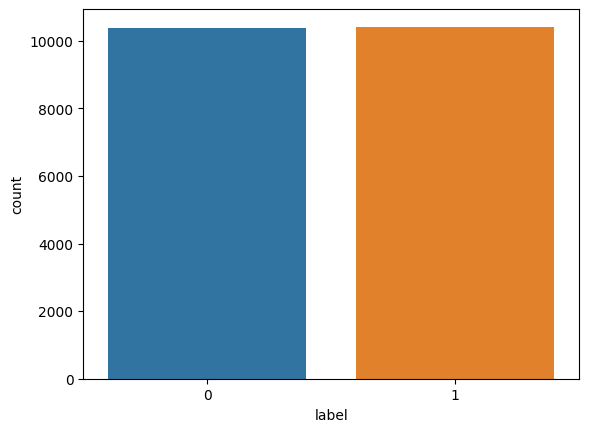

In [123]:
sns.countplot(x='label',data=news_dataset)

Let's make wordcloud of True and Fake News Respectively. so, we can analyze that which words are often used in both type of news.

In [126]:
from wordcloud import WordCloud

# make object of wordcloud
wc = WordCloud(background_color='white',min_font_size=10,width=500,height=500)

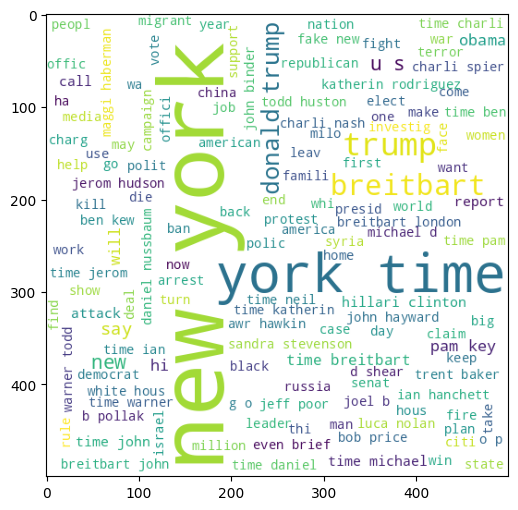

In [129]:
# WordCloud for True News
true_news_wc = wc.generate(news_dataset[news_dataset['label'] == 0]['content'].str.cat(sep=" "))
plt.figure(figsize=(8,6))
plt.imshow(true_news_wc)
plt.show()



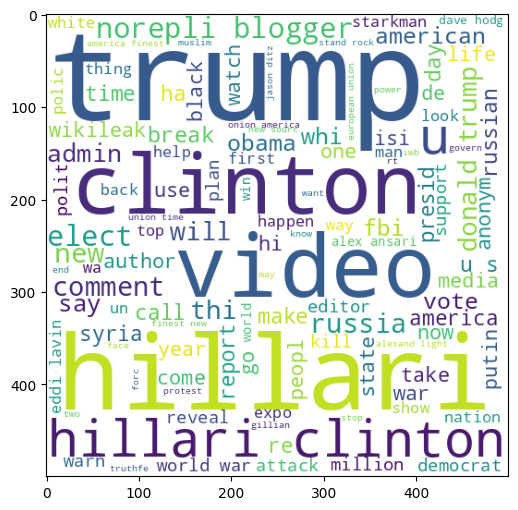

In [130]:
# WordCloud for Fake news
fake_news_wc = wc.generate(news_dataset[news_dataset['label'] == 1]['content'].str.cat(sep=" "))
plt.figure(figsize=(8,6))
plt.imshow(fake_news_wc)
plt.show()

## Stemming

In [69]:
from nltk.stem.porter import PorterStemmer

In [70]:
port_stem = PorterStemmer()

In [72]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content


In [73]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [74]:
print(news_dataset['content'])

0        darrel lucu hous dem aid we didn even see come...
1        daniel j flynn flynn hillari clinton big woman...
2           consortiumnew com whi truth might get you fire
3        jessica purkiss civilian kill in singl us airs...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper t i trump poster child for...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci is said...
20798    alex ansari nato russia to hold parallel exerc...
20799                       david swanson what keep f aliv
Name: content, Length: 20800, dtype: object


In [75]:
# separate the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [79]:
print(X)

['darrel lucu hous dem aid we didn even see comey letter until jason chaffetz tweet it'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com whi truth might get you fire' ...
 'michael j de la merc rachel abram maci is said receiv takeov approach hudson bay the new york time'
 'alex ansari nato russia to hold parallel exercis in balkan'
 'david swanson what keep f aliv']


In [80]:
print(Y)

[1 0 1 ... 0 1 1]


In [81]:
Y.shape

(20800,)

In [82]:
# convert textual data to numerical values
vectorizer = Tfinews_datasetVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [83]:
print(X)

  (0, 16586)	0.19235766814206556
  (0, 16055)	0.29053629972079575
  (0, 15762)	0.25180682754084327
  (0, 13528)	0.22682424464275375
  (0, 8949)	0.3214177525383042
  (0, 8670)	0.25823746120670493
  (0, 7731)	0.219100353547038
  (0, 7639)	0.1611238443347535
  (0, 7040)	0.19336678366028098
  (0, 4998)	0.20625126961544935
  (0, 4028)	0.2667908047240904
  (0, 3811)	0.23915031396884368
  (0, 3619)	0.31814479104571186
  (0, 2977)	0.21821000835755877
  (0, 2501)	0.3250028762214839
  (0, 272)	0.2387684291853839
  (1, 16892)	0.30071745655510157
  (1, 6849)	0.1904660198296849
  (1, 5528)	0.7143299355715573
  (1, 3587)	0.26373768806048464
  (1, 2831)	0.19094574062359204
  (1, 2241)	0.3827320386859759
  (1, 1910)	0.15521974226349364
  (1, 1512)	0.2939891562094648
  (2, 17095)	0.29337976465513754
  :	:
  (20797, 9631)	0.17242189281191916
  (20797, 9561)	0.2918128273796141
  (20797, 9030)	0.35719284755530417
  (20797, 8404)	0.22049990081059304
  (20797, 7611)	0.13993333005918895
  (20797, 7077)	0.215

### Splitting dataset into Test and Train data 

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3,stratify=Y, random_state=101)

### Training Model : Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
model = LogisticRegression()

In [88]:
model.fit(X_train,y_train)

LogisticRegression()

### Evaluation using accuracy score

In [105]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [90]:
# accuracy of training data
X_train_pred = model.predict(X_train)
training_acc = accuracy_score(X_train_pred,y_train)

In [91]:
print('Training data accuracy : ',training_acc)

Training data accuracy :  0.985989010989011


In [106]:
print(classification_report(y_train,X_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7271
           1       0.98      1.00      0.99      7289

    accuracy                           0.99     14560
   macro avg       0.99      0.99      0.99     14560
weighted avg       0.99      0.99      0.99     14560



In [94]:
# accuracy of test data
X_test_pred = model.predict(X_test)
test_acc = accuracy_score(X_test_pred,y_test)

In [95]:
print('Test data accuracy : ',test_acc)

Test data accuracy :  0.9753205128205128


In [107]:
print(classification_report(y_test,X_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3116
           1       0.96      0.99      0.98      3124

    accuracy                           0.98      6240
   macro avg       0.98      0.98      0.98      6240
weighted avg       0.98      0.98      0.98      6240



## Predictive System

In [96]:
X_new = X_test[0]

pred = model.predict(X_new)
print(pred)

if(pred[0]==0):
  print('The news is real !!')
else:
  print('The news is fake !!')

[0]
The news is real !!


In [97]:
print(y_test[0])

0


######Here, the model has succesfully predicted the value as **Real** as confirmed by the y_test for the column value 0.

Similarly,




In [98]:
X_new = X_test[3]

pred = model.predict(X_new)
print(pred)

if(pred[0]==0):
  print('The news is real !!')
else:
  print('The news is fake !!')

[1]
The news is fake !!


In [99]:
print(y_test[3])

1


######Here, the model has succesfully predicted the value as **Fake** as confirmed by the y_test for the column value 3.